In [76]:

import requests
import json
import csv
import pandas as pd
from pprint import pprint

These are  a series of JSON files containing data for the state of Ohio pertaining to infection levels of pertussis (whooping cough). I want to know what year had the greatest number of cases per capita and what the case number was. I also want to know how many projected cases there will be in x number of years.

In [77]:
from google.colab import drive
drive.mount('/content/drive')


myfile = open('/content/drive/My Drive/INFO 2201/myfiles/1974.json',"r")
Ohio_1974 = json.loads(myfile.read())

myfile2 = open('/content/drive/My Drive/INFO 2201/myfiles/1983.json',"r")
Ohio_1983 = json.loads(myfile2.read())

myfile3 = open('/content/drive/My Drive/INFO 2201/myfiles/1993.json',"r")
Ohio_1993 = json.loads(myfile3.read())

myfile4 = open('/content/drive/My Drive/INFO 2201/myfiles/2005.json',"r")
Ohio_2005 = json.loads(myfile4.read())

myfile5 = open('/content/drive/My Drive/INFO 2201/myfiles/2010.json',"r")
Ohio_2010 = json.loads(myfile5.read())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ohio data set for 1974

In [78]:
Ohio_1974

{'disease': 'PERTUSSIS',
 'increase': 0.19,
 'loc': 'OHIO',
 'number': 21,
 'population': 10770425,
 'year': 1974}



1974 cases per capita (per 100,000)

In [79]:
adjustedCases1974 = Ohio_1974['number']/Ohio_1974['population']*100000

adjustedCases1974

0.19497837829055029

Ohio data set for 1983

In [80]:
Ohio_1983

{'disease': 'PERTUSSIS',
 'increase': 1.5000000000000007,
 'loc': 'OHIO',
 'number': 154,
 'population': 10737746,
 'year': 1983}

1983 cases per capita (per 100,000)

In [81]:
adjustedCases1983 = Ohio_1983['number']/Ohio_1983['population']*100000

adjustedCases1983

1.434192986125766

Ohio data set for 1993

In [82]:
Ohio_1993

{'disease': 'PERTUSSIS',
 'increase': 4.970000000000001,
 'loc': 'OHIO',
 'number': 550,
 'population': 11101140,
 'year': 1993}

1993 cases per capita (per 100,000)

In [83]:
adjustedCases1993 = Ohio_1993['number']/Ohio_1993['population']*100000

adjustedCases1993

4.954446119948042

Ohio data set for 2005

In [84]:
Ohio_2005

{'disease': 'PERTUSSIS',
 'increase': 9.709999999999997,
 'loc': 'OHIO',
 'number': 1116,
 'population': 11475262,
 'year': 2005}

2005 cases per capita (per 100,000)

In [85]:
adjustedCases2005 = Ohio_2005['number']/Ohio_2005['population']*100000

adjustedCases2005

9.725268146383064

Ohio data set for 2010

In [86]:
Ohio_2010

{'disease': 'PERTUSSIS',
 'increase': 15.659999999999998,
 'loc': 'OHIO',
 'number': 1810,
 'population': 11532111,
 'year': 2010}

2010 cases per capita (per 100,000)

In [87]:
adjustedCases2010 = Ohio_2010['number']/Ohio_2010['population']*100000

adjustedCases2010

15.69530504865935

list of yearly per capita cases

In [88]:
OhioList = [adjustedCases1974,adjustedCases1983,adjustedCases1993,adjustedCases2005,adjustedCases2010]

OhioList

[0.19497837829055029,
 1.434192986125766,
 4.954446119948042,
 9.725268146383064,
 15.69530504865935]

max value out of the list of case per capita values

In [89]:
for i in OhioList:
  top = max(OhioList)

if top == adjustedCases1974:
  print("The highest per capita number of Pertussis cases occured in 1974")

if top == adjustedCases1983:
  print("The highest per capita number of Pertussis cases occured in 1983")

if top == adjustedCases1993:
  print("The highest per capita number of Pertussis cases occured in 1993")

if top == adjustedCases2005:
  print("The highest per capita number of Pertussis cases occured in 2005")

if top == adjustedCases2010:
  print("The highest per capita number of Pertussis cases occured in 2010")

print("The highest value of pertussis cases per capita was " + str(top))

The highest per capita number of Pertussis cases occured in 2010
The highest value of pertussis cases per capita was 15.69530504865935


percent increase per yearly interval

In [90]:
difference = [(OhioList[1]-OhioList[0]/OhioList[0]),(OhioList[2]-OhioList[1]/OhioList[1]),(OhioList[3]-OhioList[2]/OhioList[2]),(OhioList[4]-OhioList[3]/OhioList[3])]

difference


[0.43419298612576607, 3.9544461199480416, 8.725268146383064, 14.69530504865935]

average percent increase out of all the years

In [91]:
avgDifference = (sum(difference)/len(difference))

avgDifference

6.9523030752790556

average number of years per interval

In [92]:
avg_year_gap = (Ohio_2010['year']-Ohio_1974['year'])/5



forecast of cases in the future using the latest case data point multipled by the average rate of increase times the number of years inserted.

Years variable is divided by average year gap to since the data points are separated by almost a decade.

In [93]:

def FutureModel(years):

  futureCases = adjustedCases2010*(1+(avgDifference*.01))*(years/avg_year_gap)

  print("The predicted number of cases per 100,000 in " + str(years) + " years from 2010" + " is " + str(futureCases) + " according to historical data")



In [94]:
FutureModel(50)

The predicted number of cases per 100,000 in 50 years from 2010 is 116.57284877938697 according to historical data


This is a csv file showing the levels of antibiotic DDD use (daily diagnosed dose) in different geographical regions across the world from the year 2000 to the year 2018. I want to know the percent change in DDD use for each region as well as the overall percent increase worldwide by aggregating the average of all of the region's percentage changes.

In [95]:
DDDs = list()

with open("/content/drive/My Drive/INFO 2201/myfiles/DDDs.csv","r") as myfile:

  csvReader = csv.reader(myfile, delimiter=",", quotechar='"')

  next(csvReader)

  for row in csvReader:
    DDDs.append(row)


In [96]:
import pandas as pd

DDD_panda = pd.read_csv("/content/drive/My Drive/INFO 2201/myfiles/Annual DDD per day per 1000.csv")

DDD_panda

,year,Latin America and Caribbean,"Central europe, eastern Europe, and central Asia",South Asia,"Southeast Asia, east Asia, and Oceania",Sub-Saharan Africa,North Africa and Middle East
0,2000,7.6,9.9,7.8,7.7,6.5,12.4
1,2001,7.4,10.3,8.0,8.2,6.8,13.2
2,2002,7.1,10.6,8.2,8.4,7.1,13.8
3,2003,7.3,10.8,8.5,8.6,7.4,14.3
4,2004,7.5,11.2,9.0,8.3,7.7,14.8
5,2005,7.8,11.3,9.2,8.2,7.9,15.5
6,2006,8.4,11.3,9.7,7.8,8.1,16.2
7,2007,8.7,11.5,9.9,7.8,8.3,16.9
8,2008,9.2,11.6,10.3,8.3,8.5,17.6
9,2009,9.5,11.8,10.7,8.3,8.7,18.3


In [97]:
DDD_panda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   year                                              19 non-null     int64  
 1   Latin America and Caribbean                       19 non-null     float64
 2   Central europe, eastern Europe, and central Asia  19 non-null     float64
 3   South Asia                                        19 non-null     float64
 4   Southeast Asia, east Asia, and Oceania            19 non-null     float64
 5   Sub-Saharan Africa                                19 non-null     float64
 6   North Africa and Middle East                      19 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.2 KB


In [98]:
DDDs

[['Latin America and Caribbean',
  '7.6',
  '7.4',
  '7.1',
  '7.3',
  '7.5',
  '7.8',
  '8.4',
  '8.7',
  '9.2',
  '9.5',
  '10.1',
  '10.4',
  '10.6',
  '10.3',
  '10.2',
  '10.5',
  '10.6',
  '10.8',
  '11.1'],
 ['Central europe, eastern Europe, and central Asia',
  '9.9',
  '10.3',
  '10.6',
  '10.8',
  '11.2',
  '11.3',
  '11.3',
  '11.5',
  '11.6',
  '11.8',
  '12.2',
  '12.5',
  '12.7',
  '12.8',
  '13.2',
  '13.6',
  '13.9',
  '14.1',
  '14.5'],
 ['South Asia',
  '7.8',
  '8',
  '8.2',
  '8.5',
  '9',
  '9.2',
  '9.7',
  '9.9',
  '10.3',
  '10.7',
  '10.9',
  '11.4',
  '11.6',
  '11.8',
  '12.4',
  '13',
  '13.6',
  '14.2',
  '14.8'],
 ['Southeast Asia, east Asia, and Oceania',
  '7.7',
  '8.2',
  '8.4',
  '8.6',
  '8.3',
  '8.2',
  '7.8',
  '7.8',
  '8.3',
  '8.3',
  '8.5',
  '8.7',
  '8.5',
  '8.6',
  '8.8',
  '8.8',
  '9.1',
  '8.9',
  '8.8'],
 ['Sub-Saharan Africa',
  '6.5',
  '6.8',
  '7.1',
  '7.4',
  '7.7',
  '7.9',
  '8.1',
  '8.3',
  '8.5',
  '8.7',
  '8.9',
  '9.1',
 

indexed columns per region

In [99]:
LA_C = DDDs[0]
CE_CA = DDDs[1]
SA = DDDs[2]
SEA_EA_OC = DDDs[3]
SSA = DDDs[4]
NA_ME = DDDs[5]


In [100]:
DDDs[3]

['Southeast Asia, east Asia, and Oceania',
 '7.7',
 '8.2',
 '8.4',
 '8.6',
 '8.3',
 '8.2',
 '7.8',
 '7.8',
 '8.3',
 '8.3',
 '8.5',
 '8.7',
 '8.5',
 '8.6',
 '8.8',
 '8.8',
 '9.1',
 '8.9',
 '8.8']

indexed year per region

In [101]:
LA_C_2000 = LA_C[1]
LA_C_2018 = LA_C[19]

CE_CA_2000 = CE_CA[1]
CE_CA_2018 = CE_CA[19]

SA_2000 = SA[1]
SA_2018 = SA[19]

SEA_EA_OC_2000 = SEA_EA_OC[1]
SEA_EA_OC_2018 = SEA_EA_OC[19]

SSA_2000 = SSA[1]
SSA_2018 = SSA[19]

NA_ME_2000 = NA_ME[1]
NA_ME_2018 = NA_ME[19]


finds average increase percentage in DDD use per region

In [102]:
increase_LA_C = (float(LA_C_2018) - float(LA_C_2000))/float(LA_C_2000)
increase_CE_CA = (float(CE_CA_2018) - float(CE_CA_2000))/float(CE_CA_2000)
increase_SA = (float(SA_2018) - float(SA_2000))/float(SA_2000)
increase_SEA_EA_OC = (float(SEA_EA_OC_2018) - float(SEA_EA_OC_2000))/float(SEA_EA_OC_2000)
increase_SSA = (float(SSA_2018) - float(SSA_2000))/float(SSA_2000)
increase_NA_ME = (float(SSA_2018) - float(SSA_2000))/float(SSA_2000)

increase_agg = (increase_LA_C + increase_CE_CA + increase_SA + increase_SEA_EA_OC + increase_SSA + increase_NA_ME) / 6

In [103]:
print("The percent increase in the " + str(LA_C[0]) + " region from 2000 to 2018 in DDDs was " + (str(increase_LA_C*100)) + " percent")
print("The percent increase in the " + str(CE_CA[0]) + " region from 2000 to 2018 in DDDs was " + (str(increase_CE_CA*100)) + " percent")
print("The percent increase in the " + str(SA[0]) + " region from 2000 to 2018 in DDDs was " + (str(increase_SA*100)) + " percent")
print("The percent increase in the " + str(SEA_EA_OC[0]) + " region from 2000 to 2018 in DDDs was " + (str(increase_SEA_EA_OC*100)) + " percent")
print("The percent increase in the " + str(SSA[0]) + " region from 2000 to 2018 in DDDs was " + (str(increase_SSA*100)) + " percent")
print("The percent increase in the " + str(NA_ME[0]) + " region from 2000 to 2018 in DDDs was " + str(increase_NA_ME*100) + " pecent")

print("The average increase amongst all of the regions was " + (str(increase_agg*100)) + " percent")



The percent increase in the Latin America and Caribbean region from 2000 to 2018 in DDDs was 46.05263157894737 percent
The percent increase in the Central europe, eastern Europe, and central Asia region from 2000 to 2018 in DDDs was 46.46464646464646 percent
The percent increase in the South Asia region from 2000 to 2018 in DDDs was 89.74358974358975 percent
The percent increase in the Southeast Asia, east Asia, and Oceania region from 2000 to 2018 in DDDs was 14.285714285714294 percent
The percent increase in the Sub-Saharan Africa region from 2000 to 2018 in DDDs was 72.30769230769229 percent
The percent increase in the North Africa and Middle East region from 2000 to 2018 in DDDs was 72.30769230769229 pecent
The average increase amongst all of the regions was 56.860327781380406 percent


<Axes: title={'center': 'DDD use in Sub-Saharan Africa'}, xlabel='year'>

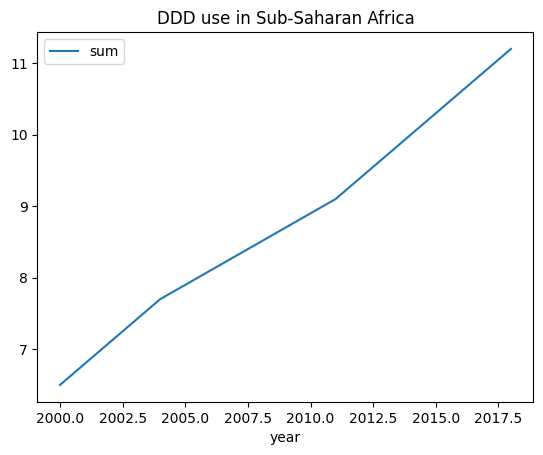

In [104]:
DDD_panda.groupby("year")["Sub-Saharan Africa"].agg([sum]).plot(title = "DDD use in Sub-Saharan Africa")


<Axes: title={'center': ' DDD use in Latin America and Caribbean'}, xlabel='year'>

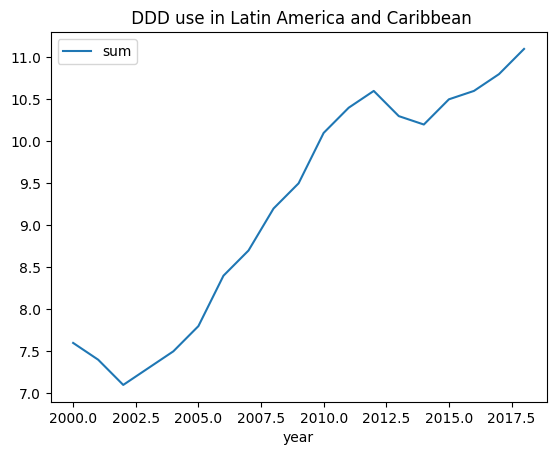

In [105]:
DDD_panda.groupby("year")["Latin America and Caribbean"].agg([sum]).plot(title = " DDD use in Latin America and Caribbean")

<Axes: title={'center': 'DDD use in Central europe, eastern Europe, and central Asia'}, xlabel='year'>

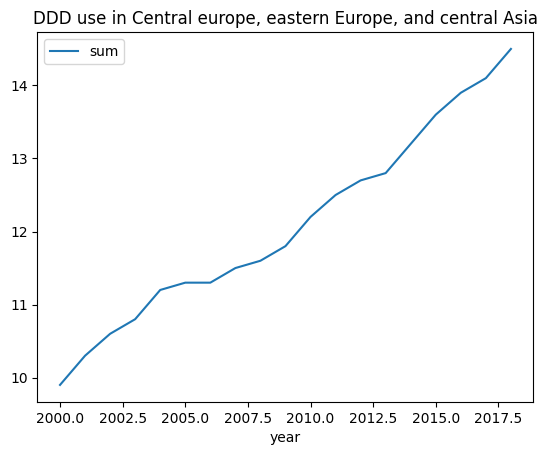

In [106]:
DDD_panda.groupby("year")["Central europe, eastern Europe, and central Asia"].agg([sum]).plot(title = "DDD use in Central europe, eastern Europe, and central Asia" )

<Axes: title={'center': 'DDD use in South Asia'}, xlabel='year'>

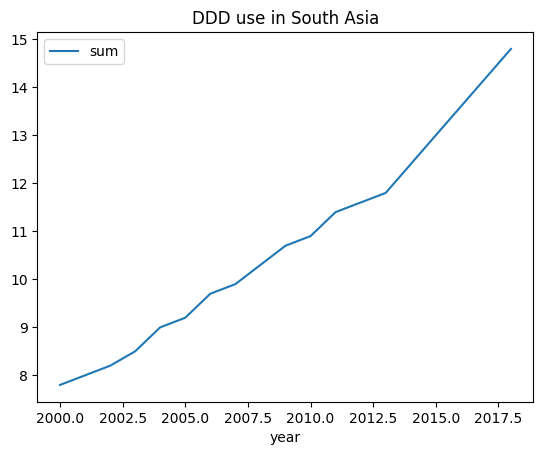

In [107]:
DDD_panda.groupby("year")["South Asia"].agg([sum]).plot(title = "DDD use in South Asia")

<Axes: title={'center': 'DDD use in North Africa and Middle East'}, xlabel='year'>

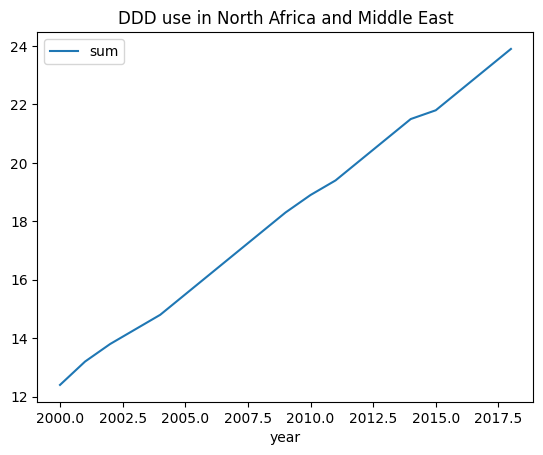

In [108]:
DDD_panda.groupby("year")["North Africa and Middle East"].agg([sum]).plot(title = "DDD use in North Africa and Middle East")

<Axes: title={'center': 'DDD use in Southeast Asia, east Asia, and Oceania'}, xlabel='year'>

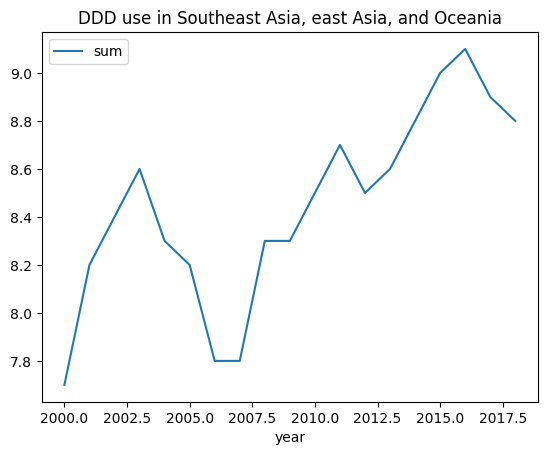

In [109]:
DDD_panda.groupby("year")["Southeast Asia, east Asia, and Oceania"].agg([sum]).plot(title = "DDD use in Southeast Asia, east Asia, and Oceania")